In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# 1. Data Loading
Load the dataset using pandas and show the head and tail of the dataset.


In [3]:
df = pd.read_csv("C:/Users/باسل/OneDrive/Desktop/my_part/loan_prediction.csv", encoding="utf-8")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# 3. Data Cleaning
Handle missing values, remove duplicates, and check for outliers.


In [5]:
# Check how many duplicate rows there are
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

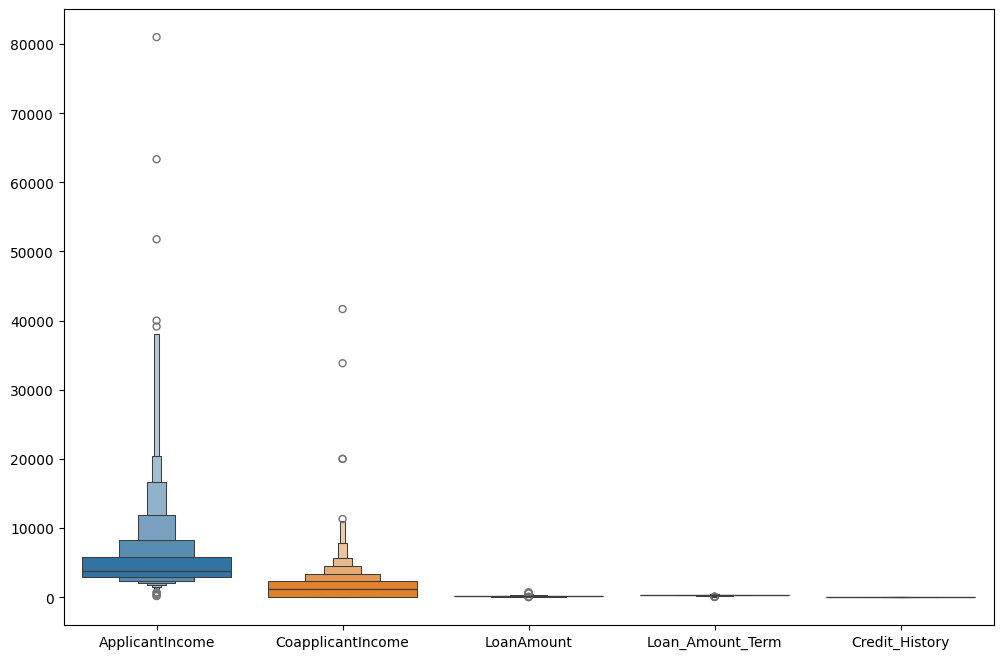

In [9]:
#checking the outliers
plt.figure(figsize=(12,8))
sns.boxenplot(data=df)

In [10]:
#fill the null values of numerical datatype
df['LoanAmount'] =df['LoanAmount'].fillna(df['LoanAmount'].median()) 
df['Loan_Amount_Term'] =df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
#using mode for numeric (binary) cause when used mean i got invalid value 0.84
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [11]:
#fill the null value of object datatype
df['Gender'] =df['Gender'].fillna(df['Gender'].mode()[0]) 
df['Married'] =df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] =df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] =df['Self_Employed'].fillna(df['Self_Employed'].mode()[0]) 

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Value counts for Gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


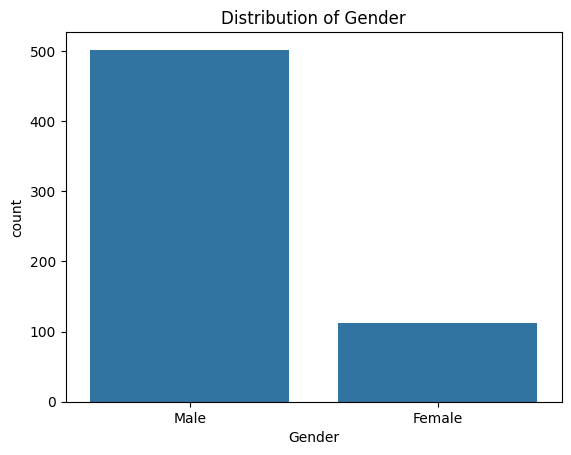


Value counts for Married:
Married
Yes    401
No     213
Name: count, dtype: int64


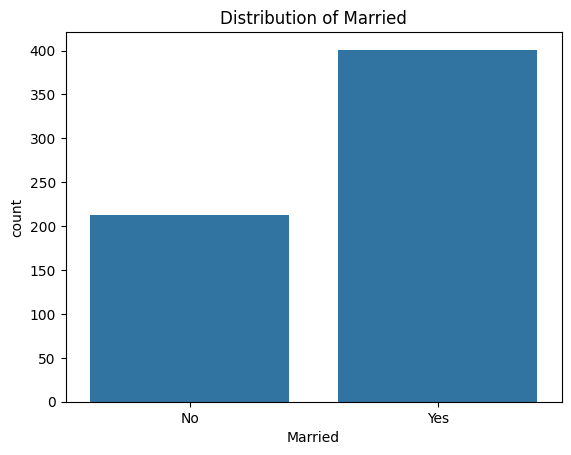


Value counts for Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


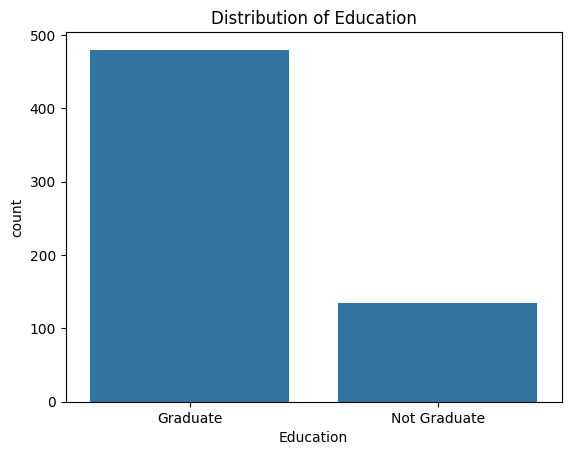


Value counts for Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


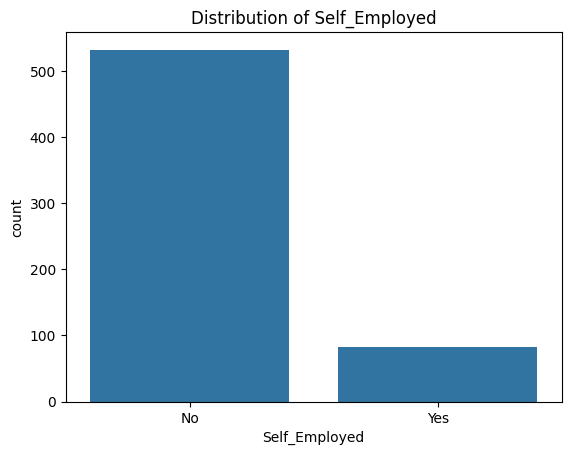


Value counts for Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


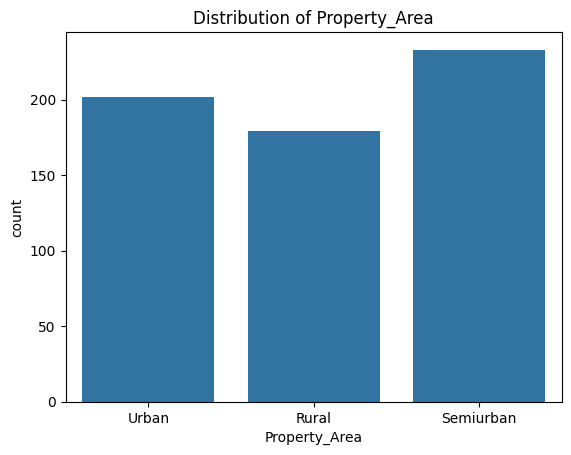


Value counts for Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


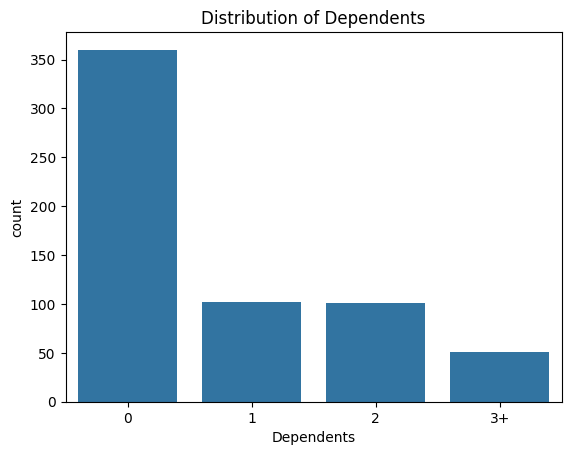


Value counts for Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


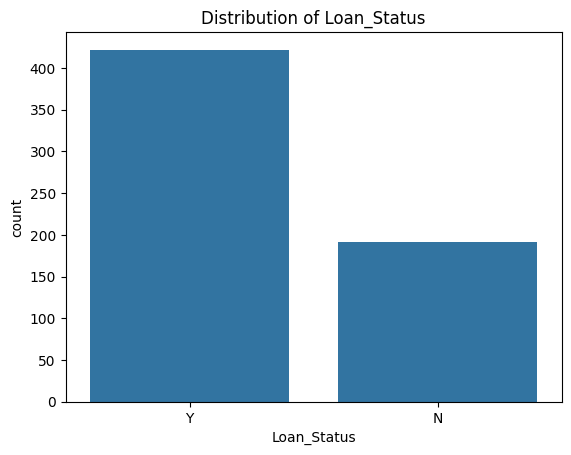


Value counts for Credit_History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


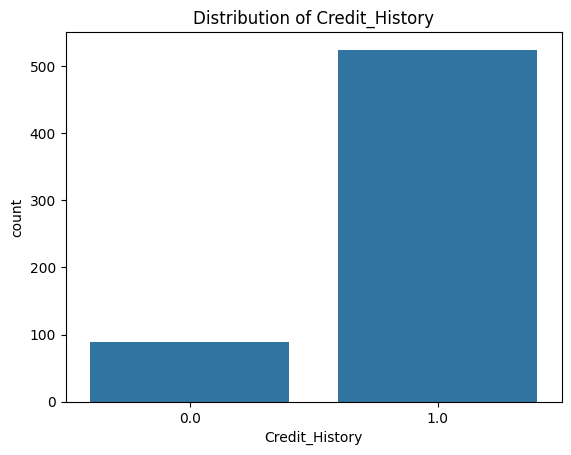

In [ ]:
# Display value counts and count plots for categorical columns
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Status','Credit_History']
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    eda = (f'static/images/{col}_Distribution.png')
    plt.savefig(eda)
    plt.show()
    plt.clf()



Target variable (Loan_Status) distribution:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


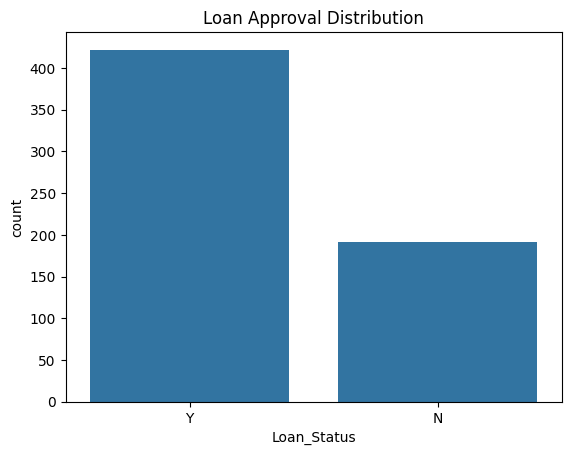

In [14]:
# Visualize the distribution of the target variable (Loan_Status)
print("\nTarget variable (Loan_Status) distribution:")
print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.show()


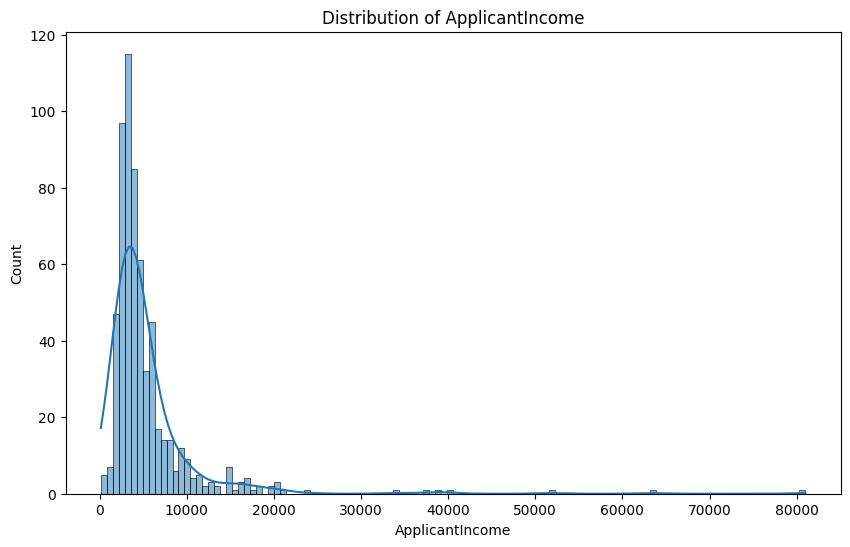

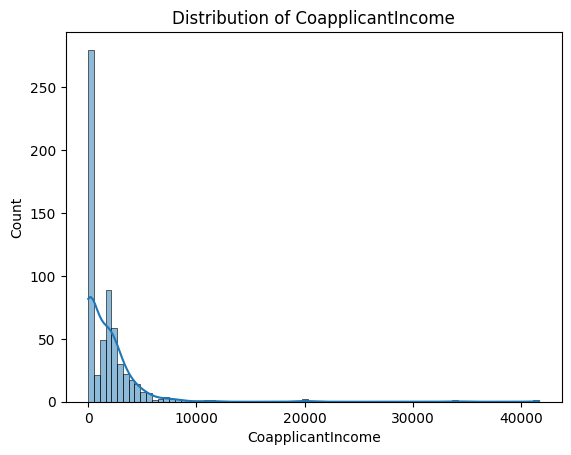

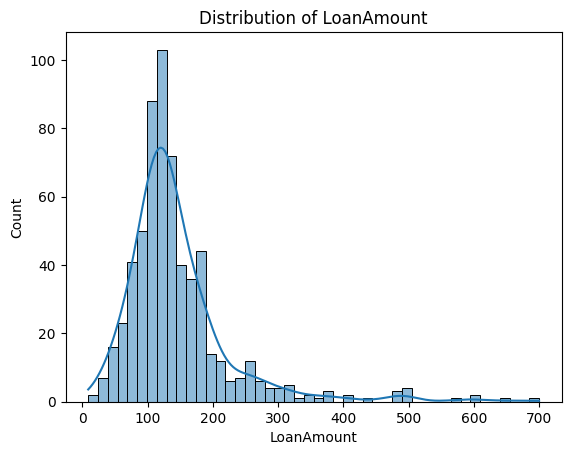

In [15]:
#Plot histograms with KDE for numerical features
plt.figure(figsize=(10,6))
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


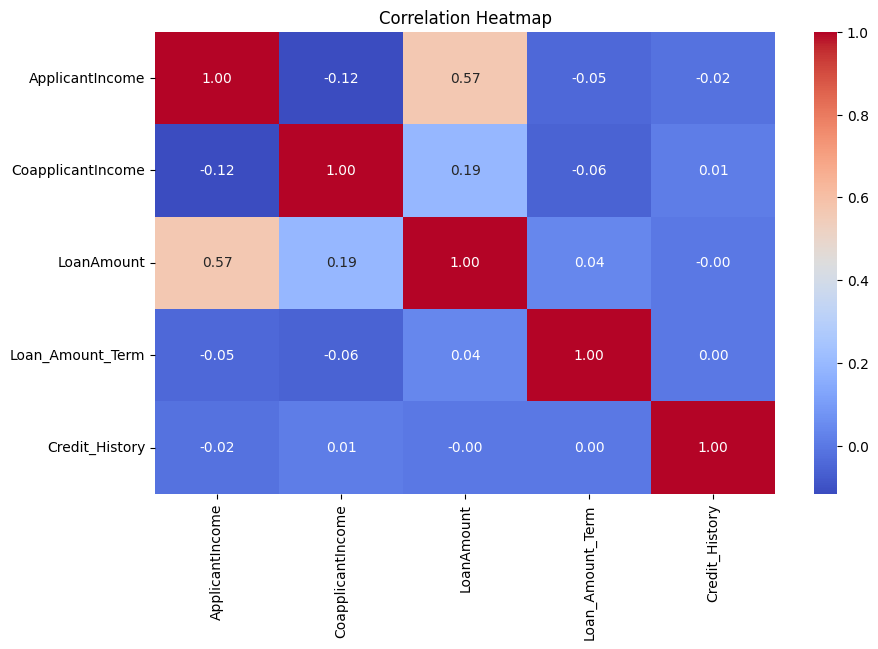

In [16]:
 # correlation for numerical data
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Feature Engineering
Create new features like Total_Income, and apply log transformations.


In [17]:
# Create a new column for total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


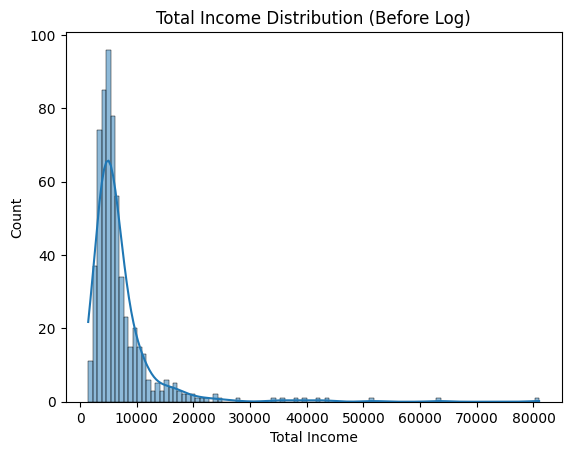

In [18]:
# Plot distribution of Total_Income before log transformation
sns.histplot(df['Total_Income'], kde=True)
plt.title('Total Income Distribution (Before Log)')
plt.xlabel('Total Income')
plt.show()


In [19]:
 # Apply log transformation to reduce skewness
df['Log_Total_Income'] = np.log1p(df['Total_Income'])


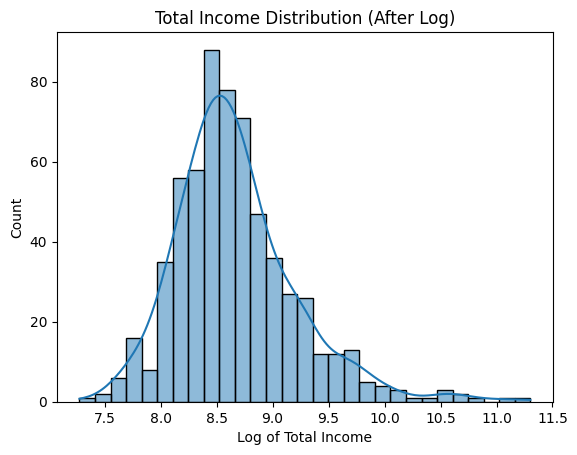

In [20]:
# Plot distribution of Log_Total_Income
sns.histplot(df['Log_Total_Income'], kde=True)
plt.title('Total Income Distribution (After Log)')
plt.xlabel('Log of Total Income')
plt.show()


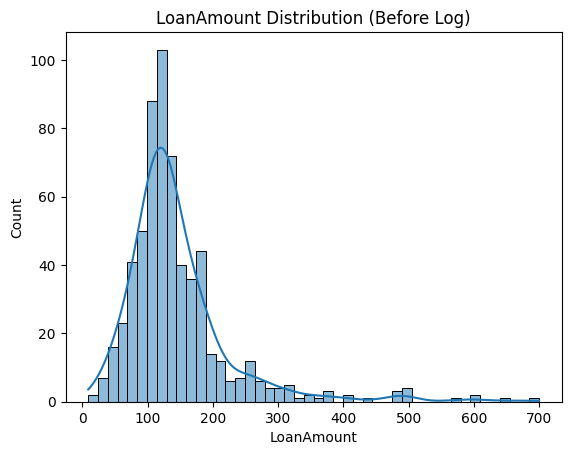

In [21]:
# Plot distribution of LoanAmount before log transformation
sns.histplot(df['LoanAmount'], kde=True)
plt.title('LoanAmount Distribution (Before Log)')
plt.xlabel('LoanAmount')
plt.show()

In [22]:
# Apply log transformation to LoanAmount 
df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])


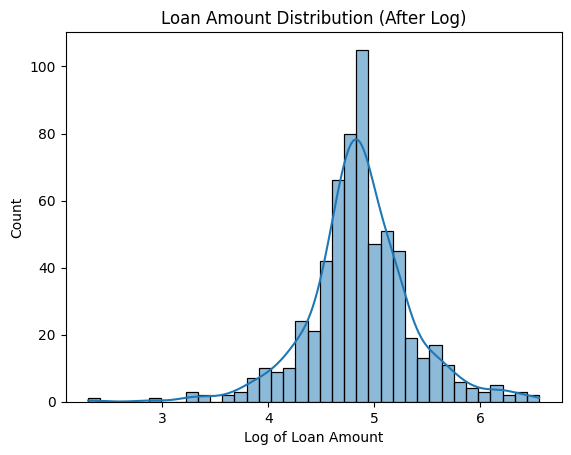

In [23]:
# Plot distribution of Log_LoanAmount
sns.histplot(df['Log_LoanAmount'], kde=True)
plt.title('Loan Amount Distribution (After Log)')
plt.xlabel('Log of Loan Amount')
plt.show()


In [24]:
# Apply log transformation to Loan_Amount_Term 
df['Log_Loan_Amount_Term'] = np.log1p(df['Loan_Amount_Term'])

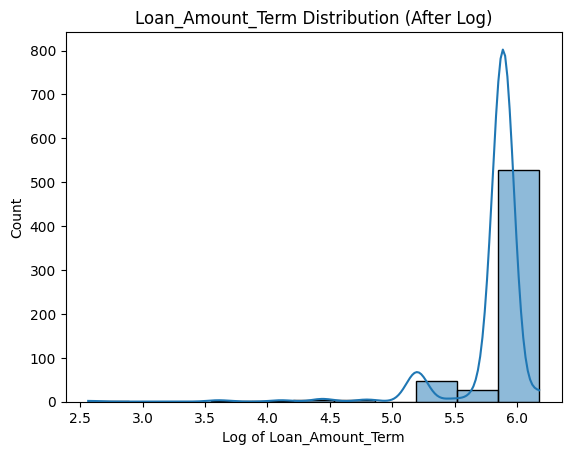

In [25]:
# Plot distribution of Log_Loan_Amount_Term
sns.histplot(df['Log_Loan_Amount_Term'], kde=True)
plt.title('Loan_Amount_Term Distribution (After Log)')
plt.xlabel('Log of Loan_Amount_Term')
plt.show()

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714732,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505525,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878


In [27]:
#drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','Total_Income','Loan_Amount_Term','LoanAmount','Loan_ID']
existing_cols = [col for col in cols if col in df.columns]
df = df.drop(columns=existing_cols)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714732,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505525,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878


# 5. Encoding Categorical Variables
Convert object types to numerical values using Label Encoding.


In [28]:
#convert to mumerical data by label encoding
from sklearn.preprocessing import LabelEncoder

cols = ['Gender','Married','Education','Self_Employed','Dependents','Property_Area','Loan_Status']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878
1,1,1,1,0,0,1.0,0,0,8.714732,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,8.505525,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878


In [29]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
Log_Total_Income        float64
Log_LoanAmount          float64
Log_Loan_Amount_Term    float64
dtype: object

In [30]:
# split the features
X = df.drop('Loan_Status', axis=1)  # Independent features
Y = df['Loan_Status']               # Dependent feature


In [31]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878
1,1,1,1,0,0,1.0,0,8.714732,4.859812,5.888878
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,8.505525,4.795791,5.888878
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497
611,1,1,1,0,0,1.0,2,9.025576,5.537334,5.888878
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878


In [32]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64